In [12]:
import os
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler 


#Load dataset into a pandas dataframe
df = pd.read_csv("../data/Cleaned data/data.csv") 

#base_dir = os.path.dirname(os.path.abspath("../../data"))
#path = os.path.join(base_dir, r"data")
#os.chdir(path) 

df.dropna(inplace = True)

df.head()



,YEAR,MONTH,DAY,DATE,TOTALDEMAND,MIN,ACCMIN,MAX,RAIN,SOLAR,RRP,FORECASTDEMAND,OUTPUT,HUMIDITYAVE,HUMIDITYMIN,HUMIDITYMAX,MONTHDATE,TEMPAVE
0,2010,1,1,2010-01-01,7793.463681,20.3,1.0,29.6,0.2,14.6,20.364894,7747.906211,1.53,0.675870,0.46,0.89,01-2010,24.95
1,2010,1,1,2010-01-01,7793.463681,20.3,1.0,29.6,0.2,14.6,20.364894,7747.906211,1.53,0.675870,0.46,0.89,01-2010,24.95
2,2010,1,1,2010-01-01,7793.463681,20.3,1.0,29.6,0.2,14.6,20.364894,7747.906211,1.53,0.735918,0.46,1.00,01-2010,24.95
3,2010,1,1,2010-01-01,7793.463681,20.3,1.0,29.6,0.2,14.6,20.364894,7747.906211,1.53,0.832766,0.69,1.00,01-2010,24.95
4,2010,1,1,2010-01-01,7793.463681,20.3,1.0,29.6,0.2,14.6,20.364894,7747.906211,1.53,0.706042,0.51,0.94,01-2010,24.95


In [13]:

#X = df.iloc[:,[3,5,9,16]]
#y = df.iloc[:,10]

df = df.drop(['DATE','MIN', 'ACCMIN','MAX','SOLAR', 'HUMIDITYMIN', 'HUMIDITYMAX', 'MONTHDATE'], axis=1)

#y = df['FORECASTDEMAND']

df.head()


,YEAR,MONTH,DAY,TOTALDEMAND,RAIN,RRP,FORECASTDEMAND,OUTPUT,HUMIDITYAVE,TEMPAVE
0,2010,1,1,7793.463681,0.2,20.364894,7747.906211,1.53,0.675870,24.95
1,2010,1,1,7793.463681,0.2,20.364894,7747.906211,1.53,0.675870,24.95
2,2010,1,1,7793.463681,0.2,20.364894,7747.906211,1.53,0.735918,24.95
3,2010,1,1,7793.463681,0.2,20.364894,7747.906211,1.53,0.832766,24.95
4,2010,1,1,7793.463681,0.2,20.364894,7747.906211,1.53,0.706042,24.95


In [14]:
# define scaler and transform data
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
data.head()

,YEAR,MONTH,DAY,TOTALDEMAND,RAIN,RRP,FORECASTDEMAND,OUTPUT,HUMIDITYAVE,TEMPAVE
0,0.0,0.0,0.0,0.319521,0.001253,0.001964,0.389996,0.003338,0.613030,0.657609
1,0.0,0.0,0.0,0.319521,0.001253,0.001964,0.389996,0.003338,0.613030,0.657609
2,0.0,0.0,0.0,0.319521,0.001253,0.001964,0.389996,0.003338,0.688724,0.657609
3,0.0,0.0,0.0,0.319521,0.001253,0.001964,0.389996,0.003338,0.810804,0.657609
4,0.0,0.0,0.0,0.319521,0.001253,0.001964,0.389996,0.003338,0.651063,0.657609


In [15]:
# Identify response variable and predion variables

X = data.drop(['TOTALDEMAND'], axis=1)
y = data['TOTALDEMAND'] 

In [16]:
# Generate a random dataset with 1400 samples and 9 features
X, y = make_classification(n_samples=1400, n_features=9, random_state=42)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier object with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=42)



Feature ranking:
1. feature 5 (0.657070)
2. feature 6 (0.168717)
3. feature 8 (0.072848)
4. feature 7 (0.067153)
5. feature 1 (0.008247)
6. feature 0 (0.007964)
7. feature 2 (0.006296)
8. feature 4 (0.006267)
9. feature 3 (0.005438)


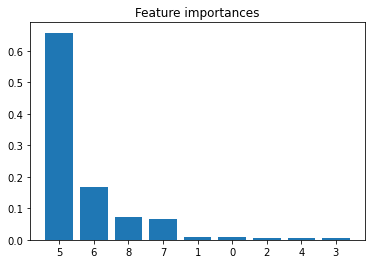

In [17]:
# Fit the classifier to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.show()

Accuracy: 0.9738095238095238
Precision: 0.9611650485436893
Recall: 0.9850746268656716
F1 score: 0.9729729729729729
ROC AUC score: 0.9742724732501874


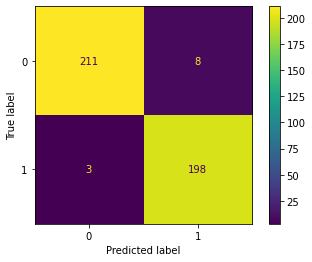

In [18]:
# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)